# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [3]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

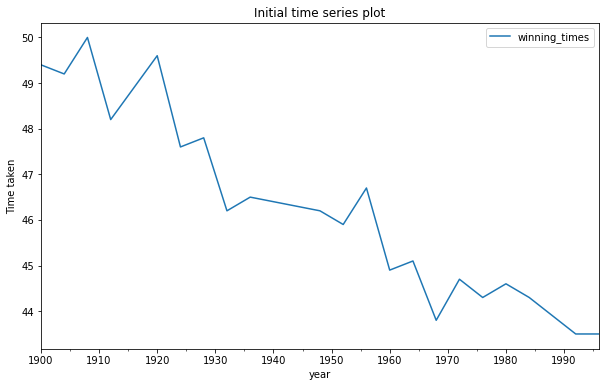

In [9]:
# Plot the time series
data.plot(figsize=(10, 6))
plt.title('Initial time series plot')
plt.ylabel('Time taken')
plt.show()

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [11]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff.head()

,winning_times
year,
1900,NaN
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

In [18]:
data_diff.dropna(inplace=True)

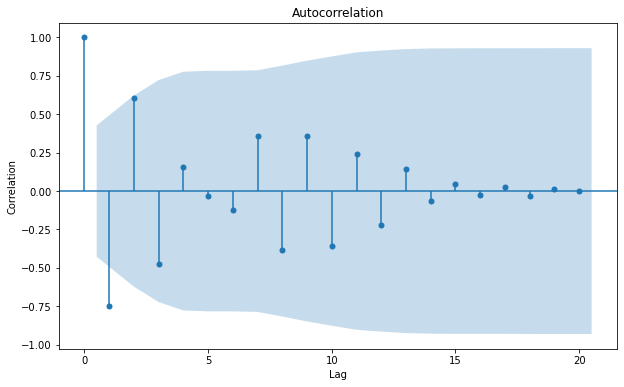

In [27]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 10, 6

plot_acf(data_diff, lags=20)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

/home/nick/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


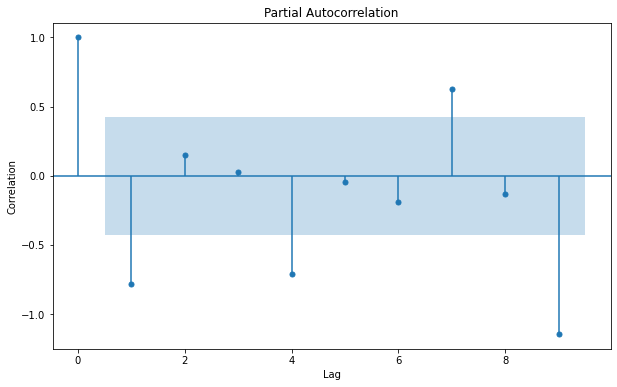

In [28]:
# Plot the PACF
rcParams['figure.figsize'] = 10, 6

plot_pacf(data_diff, lags=9)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [75]:
from statsmodels.tsa.arima_model import ARMA 

arma = ARMA(endog=data_diff, order=(1, 3))

/home/nick/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [76]:
arma_fit = arma.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87489D-01    |proj g|=  5.68171D-01

At iterate    5    f=  7.80595D-01    |proj g|=  1.67663D-03

At iterate   10    f=  7.80587D-01    |proj g|=  1.35745D-02

At iterate   15    f=  7.80584D-01    |proj g|=  1.04416D-04

At iterate   20    f=  7.80557D-01    |proj g|=  1.75804D-03

At iterate   25    f=  7.80549D-01    |proj g|=  1.02018D-04

At iterate   30    f=  7.80549D-01    |proj g|=  2.02260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/nick/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [77]:
arma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 3)   Log Likelihood                 -16.392
Method:                       css-mle   S.D. of innovations              0.452
Date:                Sat, 27 Aug 2022   AIC                             44.783
Time:                        13:00:33   BIC                             51.050
Sample:                    12-31-1904   HQIC                            46.143
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3050      0.031     -9.972      0.000      -0.365      -0.245
ar.L1.winning_times     0.1102      0.274      0.402      0.688      -0.427       0.648
ma.L1.winning_times    -0.9898      0.228     -4.337      0.000      -1.437      -0.542
ma.L2.winning_times     0.9897      0.303      3.265      0.001       0.396       1.584
ma.L3.winning_times    -0.9999      0.297     -3.371      0.001      -1.581      -0.418
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.0724           +0.0000j            9.0724            0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.0051           -1.0000j            1.0001           -0.2508
MA.3           -0.0051           +1.0000j            1.0001            0.2508
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

# Your comments here
An ARMA model of order (1, 3). 

This is because the last lag above the significance level in PCAF is p=1.

In ACF although lag 2 is within the significance level it is just at the boundary therefore I choose lag 3 as it is considerably within the significance level. 

Moreover, in the perfomance of the model:
    
    - AIC and BIC are lower for q=3
    - More of the parameter estimates for q=3 are significant
    - and log likelihood is higher for q=3 as compared to q=2

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 